## Data analysis on a dataset named "German Air Fares"

The dataset can be found and downloaded in this site : https://www.kaggle.com/datasets/darjand/domestic-german-air-fares

The data set was generated by web scraping and includes the ticket prices on 84 german connections over a period of 6 months. a total of 63,000 prices and connections are included in the data set.

We will be using PACE strategie to find out insights about collisions in new york city, we will start by getting infos about the dataset and get familiarized with it


* Import usefull packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

* Reading dataset

In [2]:
# Read the dataset using pandas

df = pd.read_csv("German Air Fares.csv")

* Examining the dataset

In [3]:
df.head()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74.00
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75.00
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80.00
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84.00
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84.00


In [4]:
df.shape

(62627, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   departure_city           62626 non-null  object
 1   arrival_city             62626 non-null  object
 2   scrape_date              62626 non-null  object
 3   departure_date           62626 non-null  object
 4   departure_date_distance  62626 non-null  object
 5   departure_time           62626 non-null  object
 6   arrival_time             62626 non-null  object
 7   airline                  62626 non-null  object
 8   stops                    62626 non-null  object
 9   price (€)                62627 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB


In [6]:
df.describe()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
count,62626,62626,62626,62626,62626,62626,62626,62626,62626,62627
unique,19,19,7,42,7,404,415,15,4,864
top,TXL Berlin-Tegel,TXL Berlin-Tegel,24.10.2019,05.12.2019,6 months,06:30 Uhr,22:05 Uhr,Lufthansa,direct,362.00
freq,13158,12698,16841,3260,12672,1099,935,45912,29278,1163


In [7]:
df = df.rename(columns={'price (€)': 'price'})

In [8]:
# df['price'] = df['price'].str.rstrip('.00').astype(int)

df['price'] = df['price'].str.replace(',', '', regex=True).str.rstrip('.00').astype(int)


In [9]:
s = np.median(df['price'])
print ('The price median equal to : ' + str(np.median(df['price'])))
print('-----------------------------------')
print('The price mean equal to : ' + str(np.mean(df['price'])))
print('-----------------------------------')
print('The minimum price equal to : ' + str(np.min(df['price'])))
print('-----------------------------------')
print('The maximum price equal to : ' + str(np.max(df['price'])))
print('-----------------------------------')
print('The standard deviation of price equal to : ' + str(np.std(df['price'])))

The price median equal to : 143.0
-----------------------------------
The price mean equal to : 414.35499065898097
-----------------------------------
The minimum price equal to : 1
-----------------------------------
The maximum price equal to : 13499686
-----------------------------------
The standard deviation of price equal to : 53943.04266552712


We can see that there is a problem here in the prices

* Checking for duplicated data, outliers ... and cleaning the dataset

In [10]:
# Checking for duplicates

df.duplicated().sum()

804

In [11]:
df[df.duplicated()].head()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price
3857,HAM Hamburg,NUE Nürnberg,18.10.2019,18.01.2020,3 month,8:00pm,9:45am,Multiple Airlines,(1 stop),178
3859,HAM Hamburg,NUE Nürnberg,18.10.2019,18.01.2020,3 month,2:50pm,9:45am,Multiple Airlines,(1 stop),178
4158,NUE Nürnberg,TXL Berlin-Tegel,18.10.2019,18.01.2020,3 month,10:25am,10:10am,Multiple Airlines,(1 stop),176
4160,NUE Nürnberg,TXL Berlin-Tegel,18.10.2019,18.01.2020,3 month,10:25am,12:05pm,Multiple Airlines,(1 stop),176
4207,NUE Nürnberg,HAM Hamburg,18.10.2019,18.01.2020,3 month,10:25am,8:55am,Multiple Airlines,(1 stop),183


I think we don't need to drop duplicates because same flights can happen

In [12]:
# Checking for missing values
df.isna().sum()

departure_city             1
arrival_city               1
scrape_date                1
departure_date             1
departure_date_distance    1
departure_time             1
arrival_time               1
airline                    1
stops                      1
price                      0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

departure_city             0
arrival_city               0
scrape_date                0
departure_date             0
departure_date_distance    0
departure_time             0
arrival_time               0
airline                    0
stops                      0
price                      0
dtype: int64

<AxesSubplot: xlabel='price'>

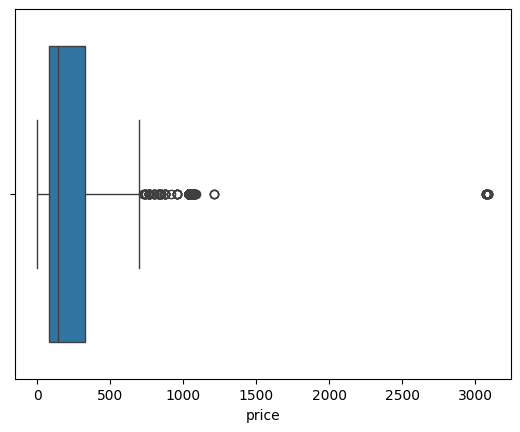

In [15]:
# Checking price problem using a boxplot

sns.boxplot(x = df['price'])

We can see that there is some outliers and some are far away like the ones that equal to 3000 euros

In [16]:
# using percentiles 25/75 we will discover the outliers withing our data
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit = ', str(upper_limit))
print('lower_limit = ', str(lower_limit))

outliers = df[(df['price'] > upper_limit) | (df['price'] < lower_limit)]
print('number of rows containing outliers = ', len(outliers))

upper limit =  697.0
lower_limit =  -295.0
number of rows containing outliers =  1414


In [17]:
# Cleaning our dataset from outliers

df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)].reset_index(drop = True)

In [18]:
df.describe()

,price
count,61212.000000
mean,179.024717
std,124.085888
min,1.000000
25%,77.000000
50%,141.000000
75%,317.000000
max,694.000000


We can see from the old describe and the new one that without outliers the results seems to be logic

In [19]:
# There is ticket prices that are equal to 3$, 5$, 8$ which are abnormal, normal prices normally starts from $100

threshold = 100
df = df[df['price'] >= threshold].reset_index()
df.shape

(41365, 11)

* Changing some columns types like object to date time types for columns that contain dates

In [20]:
# We need to change the type of these columns = scrape_date, departure_date, departure_date_distance, departure_time, arrival_time.

df['scrape_date'] = pd.to_datetime(df['scrape_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7496\1096569957.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['scrape_date'] = pd.to_datetime(df['scrape_date'])
C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7496\1096569957.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['departure_date'] = pd.to_datetime(df['departure_date'])


In [21]:
# Function to convert "Uhr" to "am/pm" format
def convert_to_am_pm(time_str):
    if 'Uhr' in time_str:
        # Replace "Uhr" with "am" or "pm" as appropriate
        time_str = time_str.replace('Uhr', 'am') if 'am' in time_str else time_str.replace('Uhr', 'pm')
    return time_str

# Convert "Uhr" to "am/pm" and then convert to datetime
df['departure_time'] = df['departure_time'].apply(convert_to_am_pm)
df['arrival_time'] = df['arrival_time'].apply(convert_to_am_pm)

In [22]:
# There is values like 8:00am and some 9:00 am for example and we need one format we can't work with two formats
def standardize_time(time_str):
    # Remove spaces
    time_str = time_str.replace(' ', '')
    
    # Check if 'am' or 'pm' is missing and add it
    if 'am' not in time_str and 'pm' not in time_str:
        if int(time_str.split(':')[0]) < 12:
            time_str += 'am'
        else:
            time_str += 'pm'
    
    return time_str

In [23]:
df['departure_time'] = df['departure_time'].apply(standardize_time)
df['arrival_time'] = df['arrival_time'].apply(standardize_time)

In [24]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M%p')
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M%p')

In [25]:
df['flight_duration'] = df['arrival_time'] - df['departure_time']
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,direct,104,0 days 01:10:00
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,direct,116,0 days 01:15:00
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,direct,131,0 days 01:15:00
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,direct,135,0 days 01:10:00
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,direct,155,0 days 01:10:00


In [26]:
df['flight_duration'] = df['flight_duration'].dt.components['hours'].astype(str).str.zfill(2) + ':' + df['flight_duration'].dt.components['minutes'].astype(str).str.zfill(2)
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,direct,104,01:10
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,direct,116,01:15
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,direct,131,01:15
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,direct,135,01:10
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,direct,155,01:10


In [27]:
df['departure_month'] = df['departure_date'].dt.month_name()
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration,departure_month
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,direct,104,01:10,October
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,direct,116,01:15,October
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,direct,131,01:15,October
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,direct,135,01:10,October
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,direct,155,01:10,October


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    41365 non-null  int64         
 1   departure_city           41365 non-null  object        
 2   arrival_city             41365 non-null  object        
 3   scrape_date              41365 non-null  datetime64[ns]
 4   departure_date           41365 non-null  datetime64[ns]
 5   departure_date_distance  41365 non-null  object        
 6   departure_time           41365 non-null  datetime64[ns]
 7   arrival_time             41365 non-null  datetime64[ns]
 8   airline                  41365 non-null  object        
 9   stops                    41365 non-null  object        
 10  price                    41365 non-null  int32         
 11  flight_duration          41365 non-null  object        
 12  departure_month          41365 n

In [29]:
# Histplot to see "departure_date_distance" and their counts
df['departure_date_distance'].value_counts()

departure_date_distance
1 week      8164
6 months    7290
6 weeks     6941
1 month     6420
2 weeks     6048
3 month     5801
2 week       701
Name: count, dtype: int64

In [30]:
df['departure_date_distance'] = df['departure_date_distance'].str.replace('1 weeks', '1 week').str.replace('3 month', '3 months')

In [31]:
df['departure_date_distance'] = df['departure_date_distance'].apply(lambda x: '2 weeks' if x == '2 week' else x)

In [32]:
df['departure_date_distance'].value_counts()

departure_date_distance
1 week      8164
6 months    7290
6 weeks     6941
2 weeks     6749
1 month     6420
3 months    5801
Name: count, dtype: int64

<AxesSubplot: xlabel='departure_date_distance', ylabel='Count'>

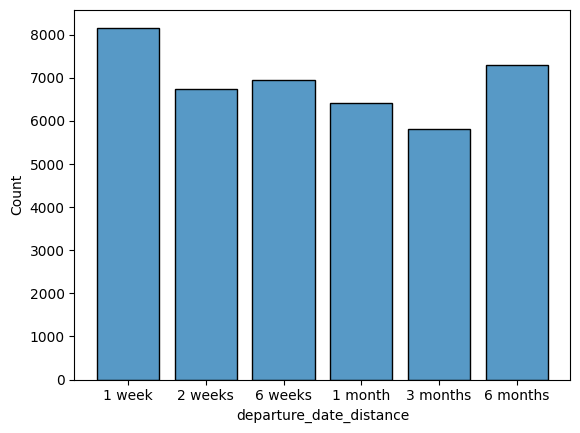

In [33]:
custom_order = ['1 week', '2 weeks', '6 weeks', '1 month', '3 months', '6 months']

df['departure_date_distance'] = pd.Categorical(df['departure_date_distance'], categories=custom_order, ordered=True)

sns.histplot(data=df, x='departure_date_distance', shrink = 0.8, discrete=True)

Text(0.5, 1.0, 'Number of flights per airline')

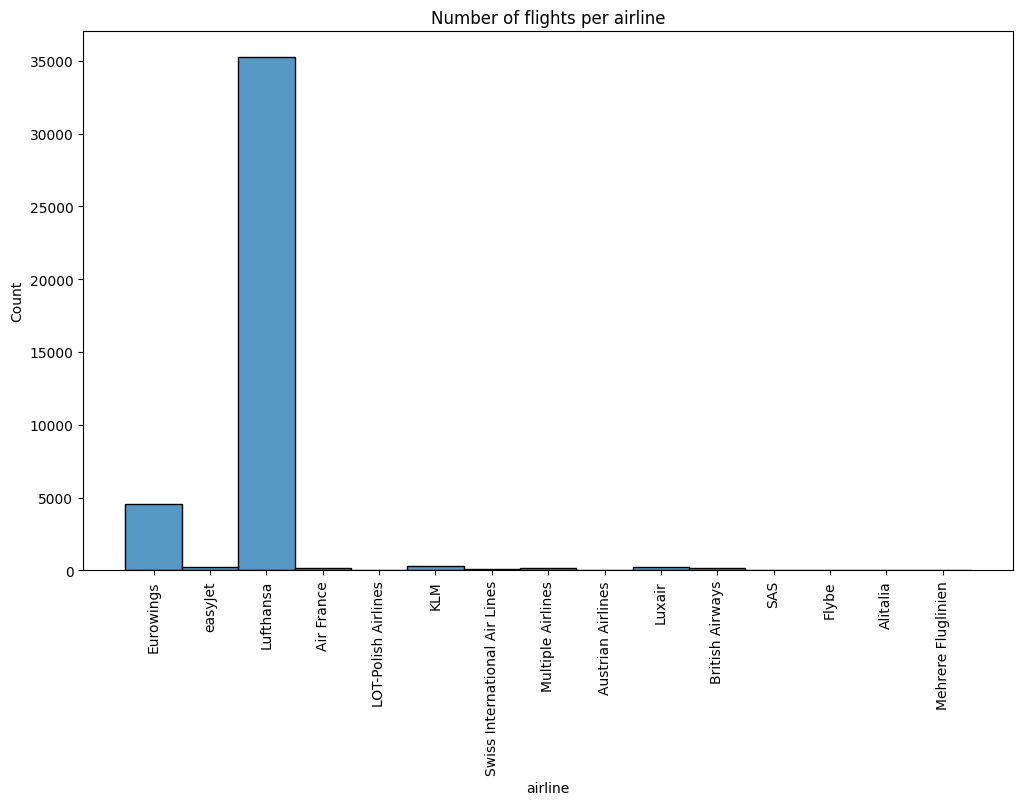

In [34]:
plt.figure(figsize = (12, 7))
sns.histplot(x = df['airline'])
plt.xticks(rotation=90)
plt.title('Number of flights per airline')

The top 3 airlines with the most flights are : 
* Lufthansa
* Eurowings
* KLM


* Encoding "stops" column from object to integer

In [35]:
df['stops'].unique()

array(['direct', '(1 stop)', '(1 Stopp)', '(2 Stopps)'], dtype=object)

* 1 Stopp -> 1 Stop
* 1 stop -> 1 Stop
* 2 Stopps -> 2 Stops

Maybe some typos and we should correct this error

In [36]:
df['stops'] = df['stops'].str.replace('1 Stopp', '1 Stop').str.replace('1 stop', '1 Stop').str.replace('2 Stopps', '2 Stops')

In [37]:
df['stops'].unique()

array(['direct', '(1 Stop)', '(2 Stops)'], dtype=object)

In [38]:
mapping = {'direct': 0, '(1 Stop)': 1, '(2 Stops)': 2}
df['stops'] = df['stops'].replace(mapping)
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration,departure_month
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,0,104,01:10,October
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,0,116,01:15,October
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,0,131,01:15,October
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,0,135,01:10,October
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,0,155,01:10,October


In [39]:
df['stops'].unique()

array([0, 1, 2], dtype=int64)

In [40]:
df['stops'].dtypes

dtype('int64')

In [41]:
total_stops = df.groupby('airline')['stops'].sum().reset_index()
total_stops = total_stops.sort_values(by='stops', ascending=False)
total_stops

,airline,stops
8,Lufthansa,25524
4,Eurowings,411
6,KLM,323
0,Air France,166
11,Multiple Airlines,142
13,Swiss International Air Lines,121
2,Austrian Airlines,42
7,LOT-Polish Airlines,29
10,Mehrere Fluglinien,4
5,Flybe,3


<AxesSubplot: xlabel='departure_month', ylabel='Count'>

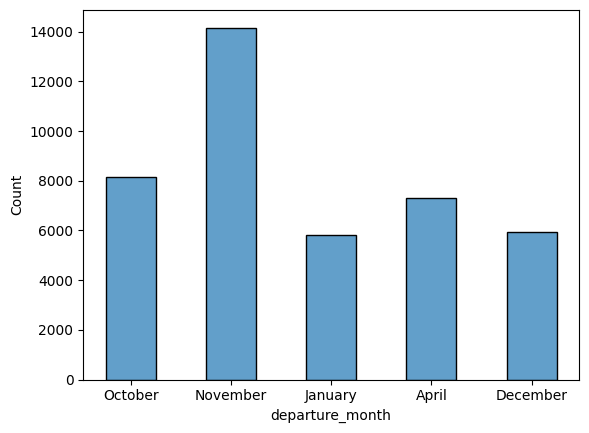

In [42]:
sns.histplot(x = df['departure_month'], shrink= 0.5, alpha = 0.7 )

In [43]:
month_order = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
total_month = df.groupby('departure_month')['price'].sum().reindex(index=month_order)
total_month

departure_month
January      1270174.0
February           NaN
March              NaN
April        1767701.0
May                NaN
June               NaN
July               NaN
August             NaN
September          NaN
October      2216751.0
November     3357565.0
December     1366432.0
Name: price, dtype: float64

In [44]:
df['departure_month'].unique()

array(['October', 'November', 'January', 'April', 'December'],
      dtype=object)

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7496\2703628744.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order)


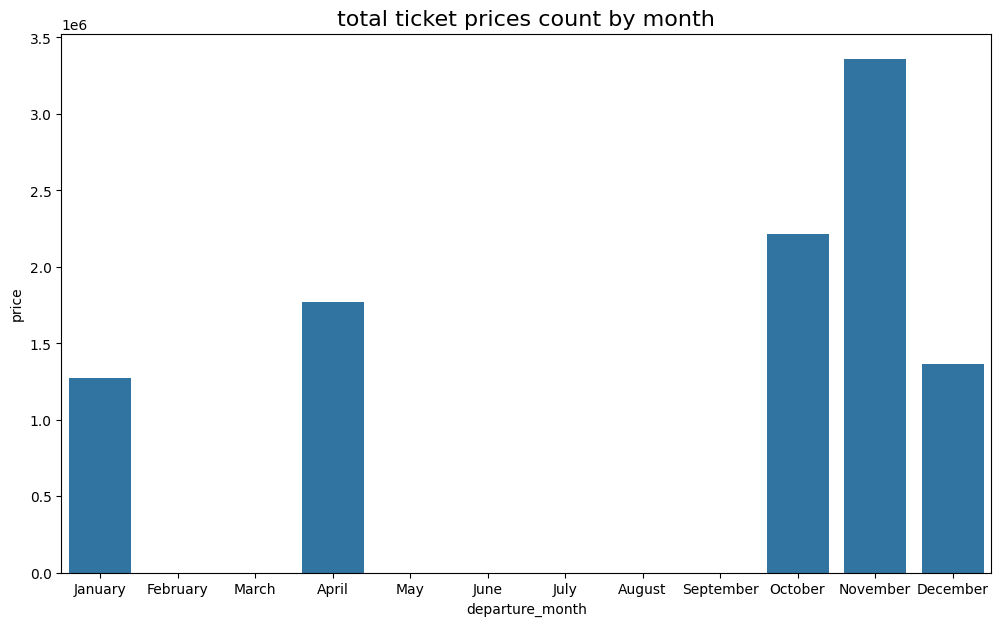

In [45]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_month.index, y= total_month)
ax.set_xticklabels(month_order)
plt.title('total ticket prices count by month', fontsize=16);

We can see that november is the best month for flights and all flights in this dataset are in january, april, october, november, december

In [46]:
df['departure_day'] = df['departure_date'].dt.day_name()
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration,departure_month,departure_day
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,0,104,01:10,October,Friday
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,0,116,01:15,October,Friday
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,0,131,01:15,October,Friday
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,0,135,01:10,October,Friday
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,0,155,01:10,October,Friday


In [47]:
df['departure_day'].unique()

array(['Friday', 'Monday', 'Saturday', 'Tuesday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

<AxesSubplot: xlabel='departure_day', ylabel='Count'>

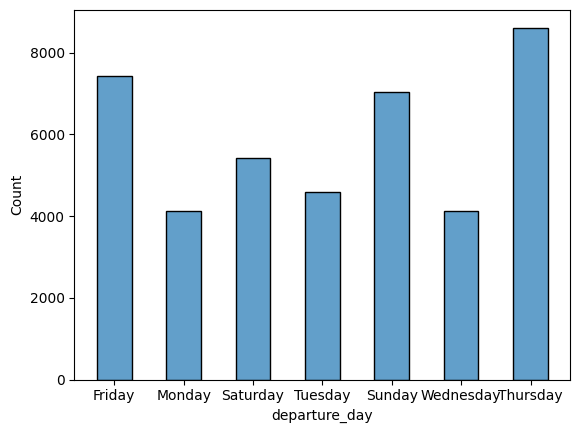

In [48]:
sns.histplot(x = df['departure_day'], shrink= 0.5, alpha = 0.7)

In [49]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_day = df.groupby('departure_day')['price'].sum().reindex(index=day_order)
total_day

departure_day
Monday        905002
Tuesday       991398
Wednesday     840922
Thursday     2140670
Friday       1790961
Saturday     1462608
Sunday       1847062
Name: price, dtype: int32

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7496\175985365.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_order)


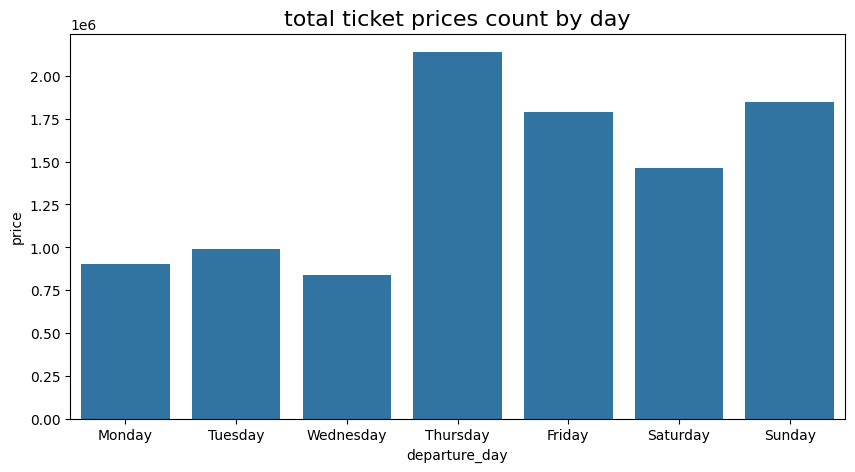

In [50]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=total_day.index, y= total_day)
ax.set_xticklabels(day_order)
plt.title('total ticket prices count by day', fontsize=16);

The total prices of tickets are low at monday, tuesday, wednesday which means people don't buy alot of tickets at these days

In [51]:
df.head()

,index,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price,flight_duration,departure_month,departure_day
0,5,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,Eurowings,0,104,01:10,October,Friday
1,6,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,easyJet,0,116,01:15,October,Friday
2,7,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,easyJet,0,131,01:15,October,Friday
3,8,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,Eurowings,0,135,01:10,October,Friday
4,10,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,Eurowings,0,155,01:10,October,Friday


* Dummy encoding "departure city", "arrival city" and "airline"

In [52]:
df_enc= pd.get_dummies(df, columns=['departure_city', 'arrival_city', 'airline'], dtype = int)
df_enc.head()

,index,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,stops,price,flight_duration,departure_month,...,airline_Flybe,airline_KLM,airline_LOT-Polish Airlines,airline_Lufthansa,airline_Luxair,airline_Mehrere Fluglinien,airline_Multiple Airlines,airline_SAS,airline_Swiss International Air Lines,airline_easyJet
0,5,2019-10-18,2019-10-25,1 week,1900-01-01 08:00:00,1900-01-01 09:10:00,0,104,01:10,October,...,0,0,0,0,0,0,0,0,0,0
1,6,2019-10-18,2019-10-25,1 week,1900-01-01 08:05:00,1900-01-01 09:20:00,0,116,01:15,October,...,0,0,0,0,0,0,0,0,0,1
2,7,2019-10-18,2019-10-25,1 week,1900-01-01 09:25:00,1900-01-01 10:40:00,0,131,01:15,October,...,0,0,0,0,0,0,0,0,0,1
3,8,2019-10-18,2019-10-25,1 week,1900-01-01 08:40:00,1900-01-01 09:50:00,0,135,01:10,October,...,0,0,0,0,0,0,0,0,0,0
4,10,2019-10-18,2019-10-25,1 week,1900-01-01 08:55:00,1900-01-01 10:05:00,0,155,01:10,October,...,0,0,0,0,0,0,0,0,0,0


* Changing month, day, departure time, flight duration columns into integers

In [53]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   index                                  41365 non-null  int64         
 1   scrape_date                            41365 non-null  datetime64[ns]
 2   departure_date                         41365 non-null  datetime64[ns]
 3   departure_date_distance                41365 non-null  category      
 4   departure_time                         41365 non-null  datetime64[ns]
 5   arrival_time                           41365 non-null  datetime64[ns]
 6   stops                                  41365 non-null  int64         
 7   price                                  41365 non-null  int32         
 8   flight_duration                        41365 non-null  object        
 9   departure_month                        41365 non-null  object

In [54]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df_enc['departure_day'] = df_enc['departure_day'].map(day_mapping)


In [55]:
df_enc['departure_month'] = pd.to_datetime(df_enc['departure_month'], format='%B').dt.month

In [56]:
df_enc['departure_date_distance'].unique()

['1 week', '2 weeks', '1 month', '3 months', '6 weeks', '6 months']
Categories (6, object): ['1 week' < '2 weeks' < '6 weeks' < '1 month' < '3 months' < '6 months']

In [57]:
time_mapping = {
    '1 week': 7,
    '2 weeks': 14,
    '1 month': 30,
    '3 months': 90,
    '6 weeks': 42,
    '6 months': 180
}
df_enc['departure_date_distance'] = df_enc['departure_date_distance'].map(time_mapping)

* Encoding "price" ranges

- From 100 to 250 = Normal prices = 0 (encoded)
- From 250 to 600+ = Expensive prices = 1 (encoded)

In [58]:
df_enc['price'].describe()

count    41365.000000
mean       241.233482
std        102.213204
min        101.000000
25%        138.000000
50%        225.000000
75%        348.000000
max        694.000000
Name: price, dtype: float64

In [59]:
def encode_price(price):
    if price >= 100 and price <= 250:
        return 0
    else:
        return 1

In [60]:
df_enc['price'] = df_enc['price'].apply(encode_price)

In [61]:
df_enc['price'].value_counts(normalize= True)

price
0    0.545872
1    0.454128
Name: proportion, dtype: float64

* Dropping index from dataset

In [62]:
df_enc.drop('index', axis = 1)

,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,stops,price,flight_duration,departure_month,departure_day,...,airline_Flybe,airline_KLM,airline_LOT-Polish Airlines,airline_Lufthansa,airline_Luxair,airline_Mehrere Fluglinien,airline_Multiple Airlines,airline_SAS,airline_Swiss International Air Lines,airline_easyJet
0,2019-10-18,2019-10-25,7,1900-01-01 08:00:00,1900-01-01 09:10:00,0,0,01:10,10,5,...,0,0,0,0,0,0,0,0,0,0
1,2019-10-18,2019-10-25,7,1900-01-01 08:05:00,1900-01-01 09:20:00,0,0,01:15,10,5,...,0,0,0,0,0,0,0,0,0,1
2,2019-10-18,2019-10-25,7,1900-01-01 09:25:00,1900-01-01 10:40:00,0,0,01:15,10,5,...,0,0,0,0,0,0,0,0,0,1
3,2019-10-18,2019-10-25,7,1900-01-01 08:40:00,1900-01-01 09:50:00,0,0,01:10,10,5,...,0,0,0,0,0,0,0,0,0,0
4,2019-10-18,2019-10-25,7,1900-01-01 08:55:00,1900-01-01 10:05:00,0,0,01:10,10,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41360,2019-10-24,2020-04-24,180,1900-01-01 15:25:00,1900-01-01 16:30:00,0,0,01:05,4,5,...,0,0,0,0,0,0,0,0,0,0
41361,2019-10-24,2020-04-24,180,1900-01-01 18:45:00,1900-01-01 19:50:00,0,0,01:05,4,5,...,0,0,0,0,0,0,0,0,0,0
41362,2019-10-24,2020-04-24,180,1900-01-01 18:20:00,1900-01-01 19:35:00,0,0,01:15,4,5,...,0,0,0,0,0,0,0,0,0,0
41363,2019-10-24,2020-04-24,180,1900-01-01 10:30:00,1900-01-01 11:40:00,0,0,01:10,4,5,...,0,0,0,0,0,0,0,0,0,0


* Saving the dataset after cleaning

In [63]:
# df.to_csv('Cleaned_German_Air_Fares_Without_Encodings.csv', index = False)

* Modeling

- Decision Tree Model

Spliting the data into X_train, X_test, y_train and y_test

In [64]:
y = df_enc['price']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: price, dtype: int64

In [65]:
X = df_enc.drop(['price', 'scrape_date', 'departure_date', 'departure_time', 'arrival_time', 'flight_duration'], axis = 1)
X = X.drop('index', axis = 1)
X.head()

,departure_date_distance,stops,departure_month,departure_day,departure_city_BRE Bremen,departure_city_CGN Köln/Bonn,departure_city_DRS Dresden,departure_city_DTM Dortmund,departure_city_DUS Düsseldorf,departure_city_FDH Friedrichshafen,...,airline_Flybe,airline_KLM,airline_LOT-Polish Airlines,airline_Lufthansa,airline_Luxair,airline_Mehrere Fluglinien,airline_Multiple Airlines,airline_SAS,airline_Swiss International Air Lines,airline_easyJet
0,7,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
dtm = DecisionTreeClassifier(random_state = 0)
dtm.fit(X_train, y_train)
dtm_pred = dtm.predict(X_test)

In [68]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dtm_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dtm_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dtm_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dtm_pred))

Decision Tree
Accuracy: 0.855917
Precision: 0.857925
Recall: 0.809848
F1 Score: 0.833193


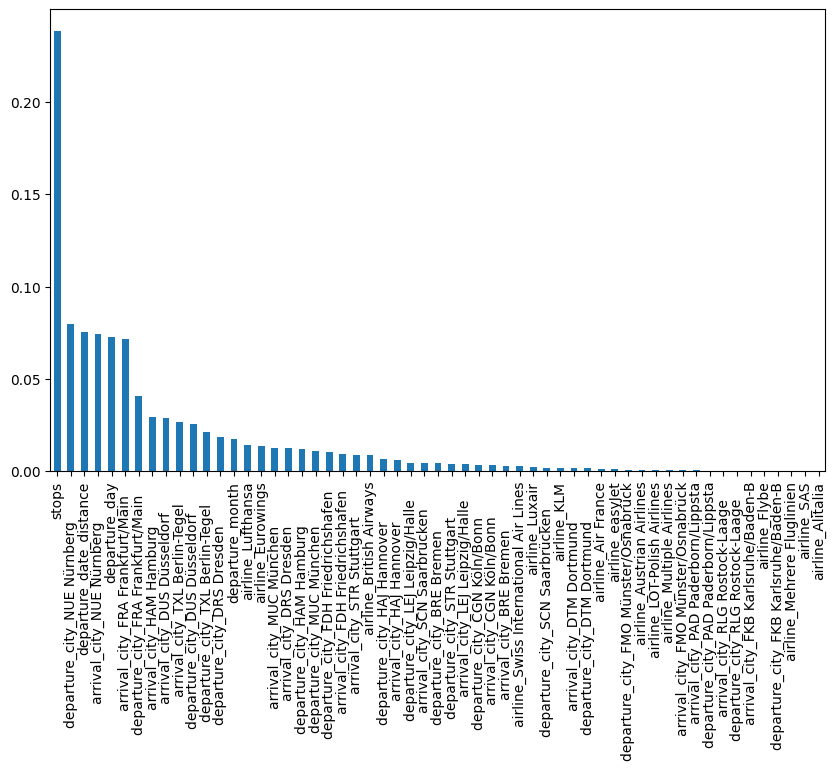

In [69]:

importances = dtm.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(ax=ax);

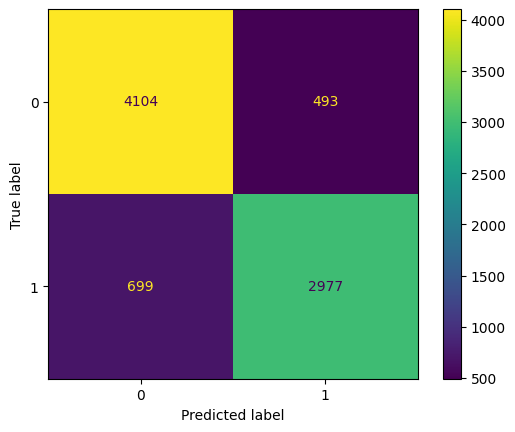

In [70]:
cm = metrics.confusion_matrix(y_test, dtm_pred, labels = dtm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dtm.classes_)
disp.plot()

* Logistic Regression Model

In [71]:
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [72]:
clf.coef_

array([[-4.65972736e-03,  2.08757254e+00,  6.35911813e-03,
         5.27326949e-02, -2.00426604e-01,  4.64831628e-01,
         1.30147831e+00,  4.42206639e-02, -3.97112864e-01,
         3.33980726e+00, -6.02624399e+00,  2.60115799e-01,
        -1.00084459e+00, -1.35918025e-01,  5.28041170e-01,
         7.15636296e-01,  6.27967823e-01, -1.64332751e+00,
        -1.83014347e-01, -7.57665644e-01,  1.54388384e+00,
         2.67355541e-01,  2.03236963e-01,  1.01868674e-02,
         5.52015472e-01,  1.70242670e+00, -4.99194268e-01,
        -5.12003207e-01,  3.09335795e+00, -5.24152258e+00,
         5.02654323e-01, -1.40873451e+00, -3.81089874e-01,
         1.92440770e-01,  7.57774549e-01,  4.75532695e-01,
        -1.55408270e+00,  2.54033335e-01, -1.21794001e+00,
         1.98639788e+00,  3.60413498e-01, -1.20645163e-01,
         1.82939936e-02, -1.55874312e-01,  1.47151822e+00,
        -5.64170829e-01, -8.41879218e-01, -2.22421995e-01,
        -5.95161553e-01,  1.50306023e+00, -3.79038560e-0

In [73]:
clf.intercept_

array([-1.38177831])

Text(0.5, 1.0, 'Departure day X price')

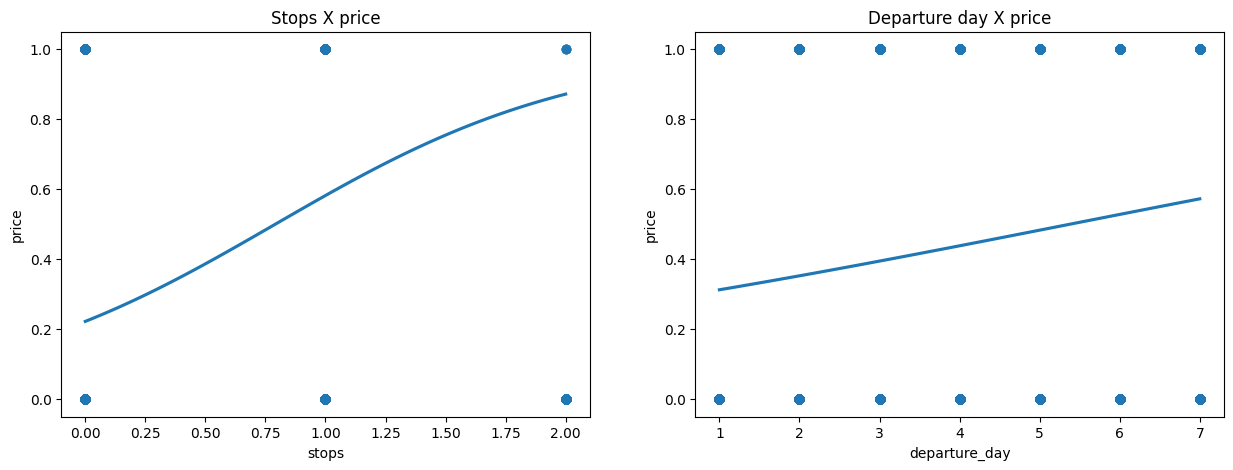

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.regplot(x = df_enc['stops'], y = df_enc['price'], logistic = True, ci = None, ax= ax[0])
ax[0].set_title('Stops X price')
sns.regplot(x = df_enc['departure_day'], y = df_enc['price'], logistic = True, ci = None, ax= ax[1])
ax[1].set_title('Departure day X price')

In [75]:
y_pred = clf.predict(X_test)

In [76]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.809501
Precision: 0.800172
Recall: 0.761425
F1 Score: 0.780318


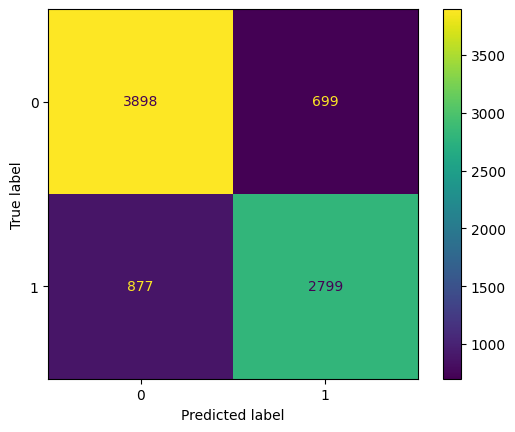

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()